# import python libraries

In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pl
import seaborn as sns

load  csv file

In [37]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [38]:
df.shape

(11251, 15)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# drop unrelated/blank columns

In [41]:
 
df.drop(['Status', 'unnamed1'] , axis=1, inplace=True)

# count how many  null values in  each column

In [42]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# change the data type of amount in integer format 

In [47]:
df['Amount']=df['Amount'].astype(int)
df['Amount'].dtypes

dtype('int32')

# rename column name of Marital_status to shaadi

In [34]:
df.rename(columns= {'Marital_Status':'Shaadi'}).head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [48]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9444.855480
std,1.716125e+03,12.754122,0.493632,1.115047,5226.442291
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5440.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8108.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [49]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9444.855480
std,12.754122,1.115047,5226.442291
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5440.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

# Gender

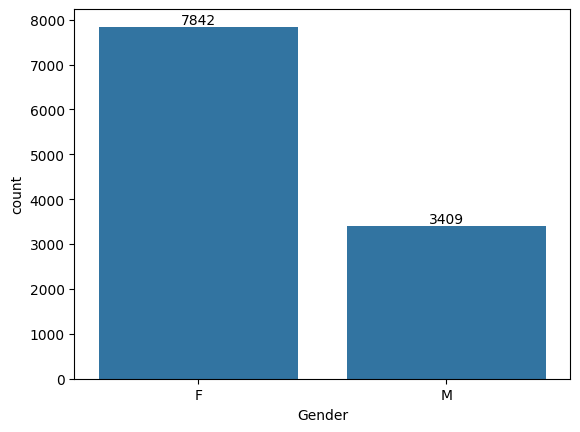

In [52]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

### plotting a bar chart for gender vs total amount

<Axes: xlabel='Gender', ylabel='Amount'>

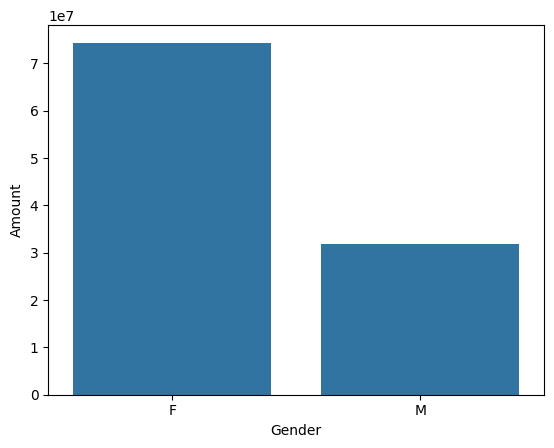

In [53]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

Count which age group made purchases compared to other age groups

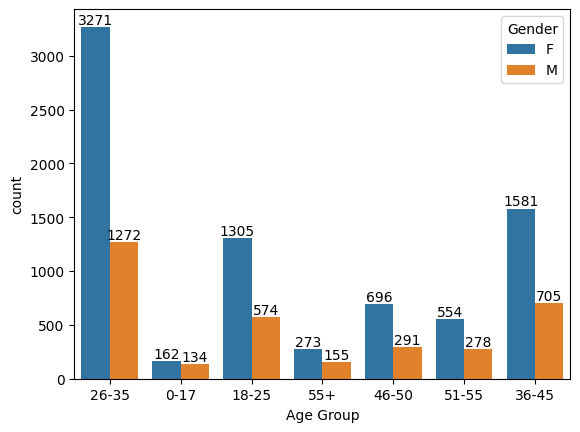

In [54]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

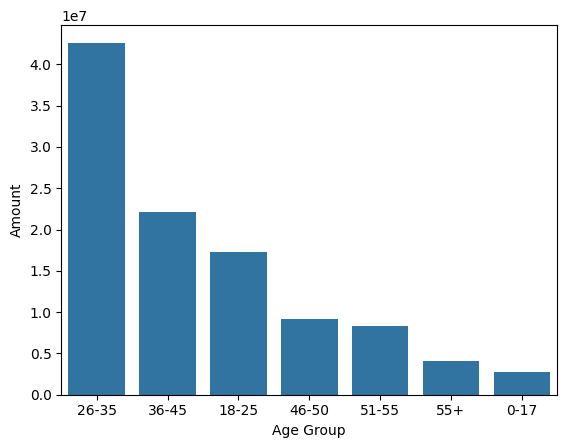

In [56]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

state

<Axes: xlabel='State', ylabel='Orders'>

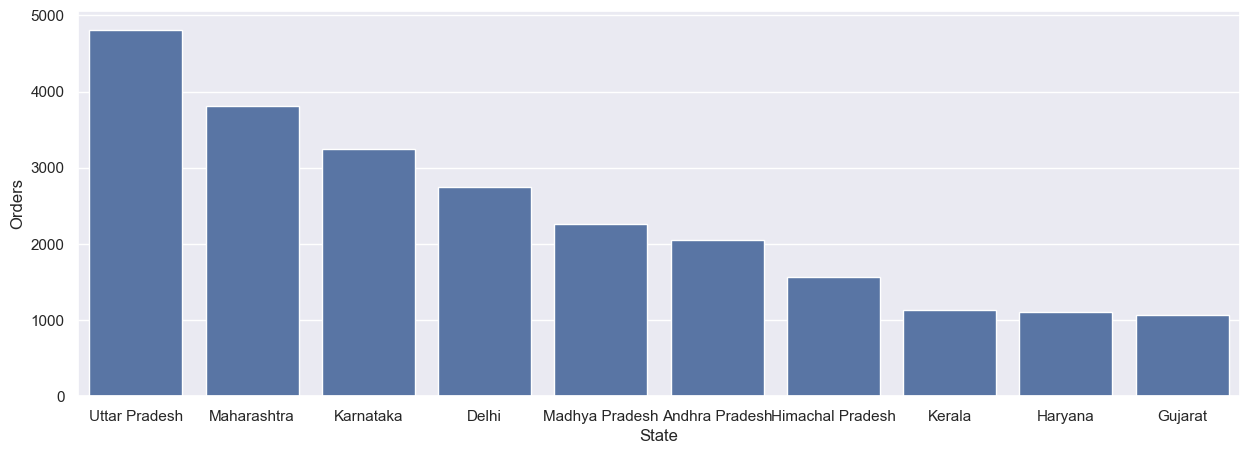

In [57]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

from above grapph we can see that most of the buyers are of age group between 26-35 yrs female

<Axes: xlabel='State', ylabel='Amount'>

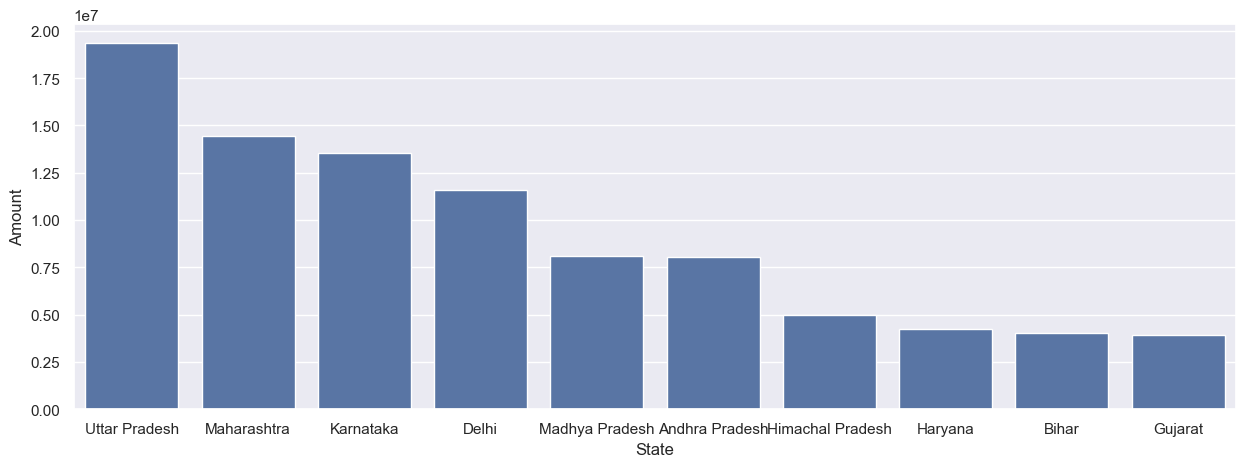

In [58]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

fro above graph we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## Marital Status

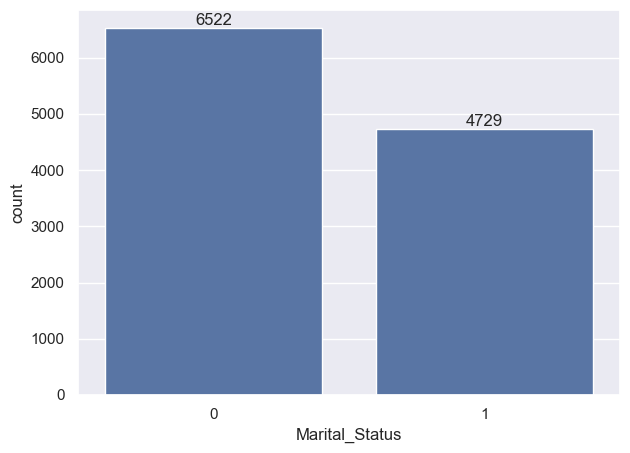

In [60]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

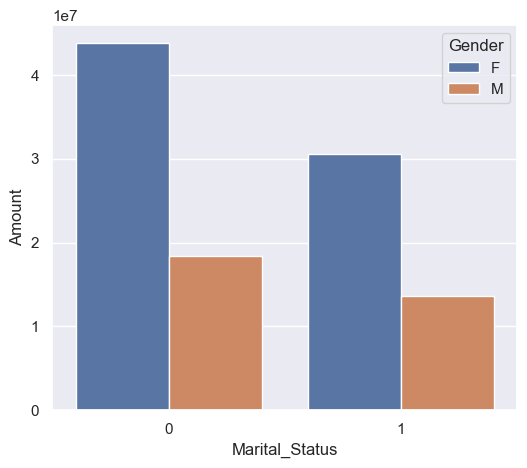

In [61]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

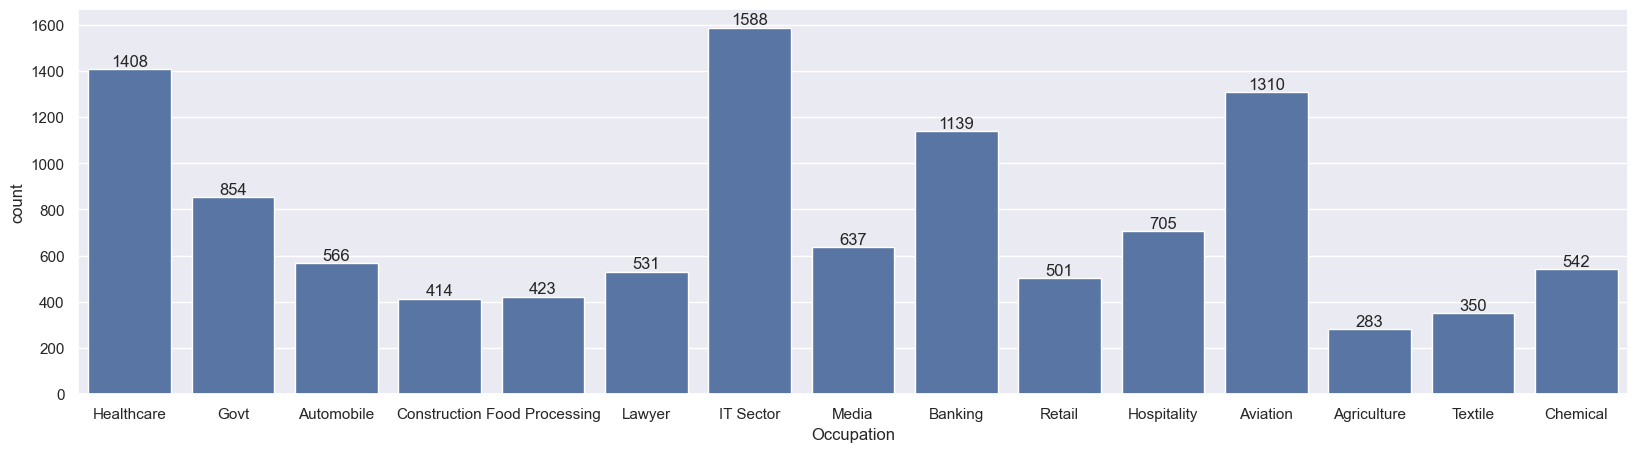

In [62]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

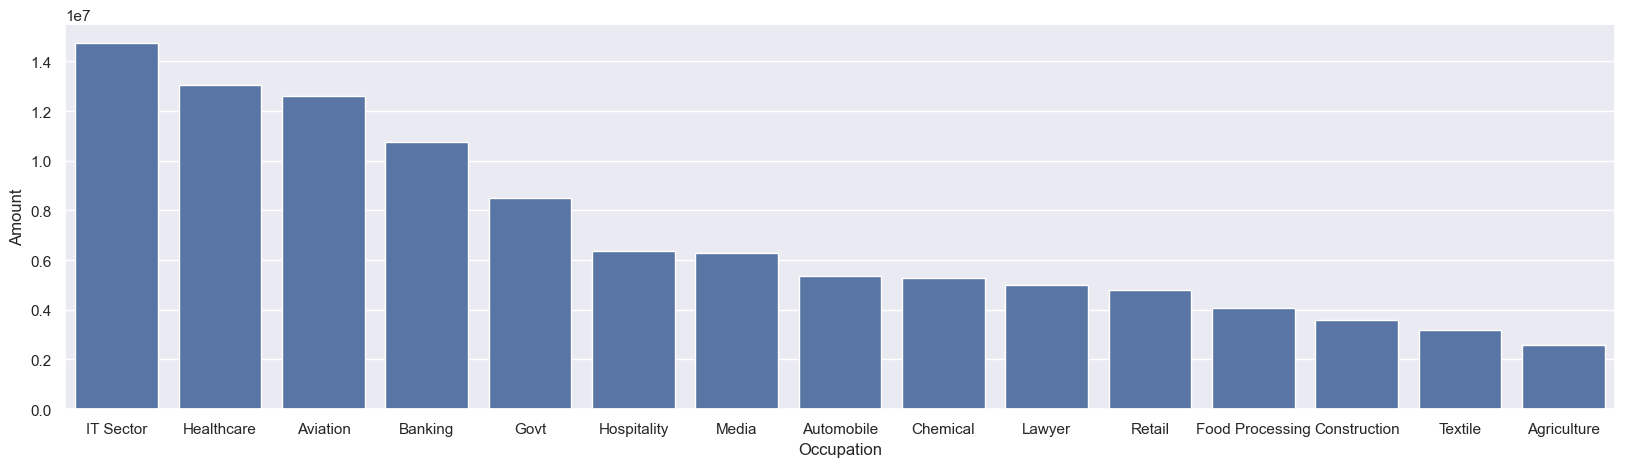

In [63]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

Product Category

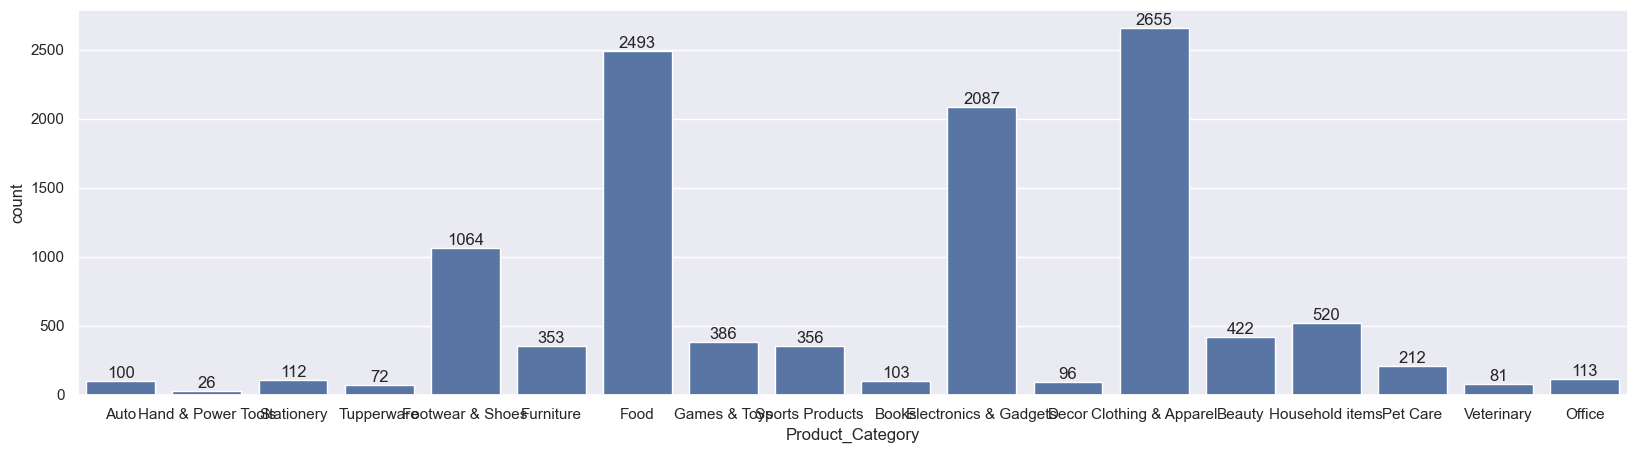

In [64]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

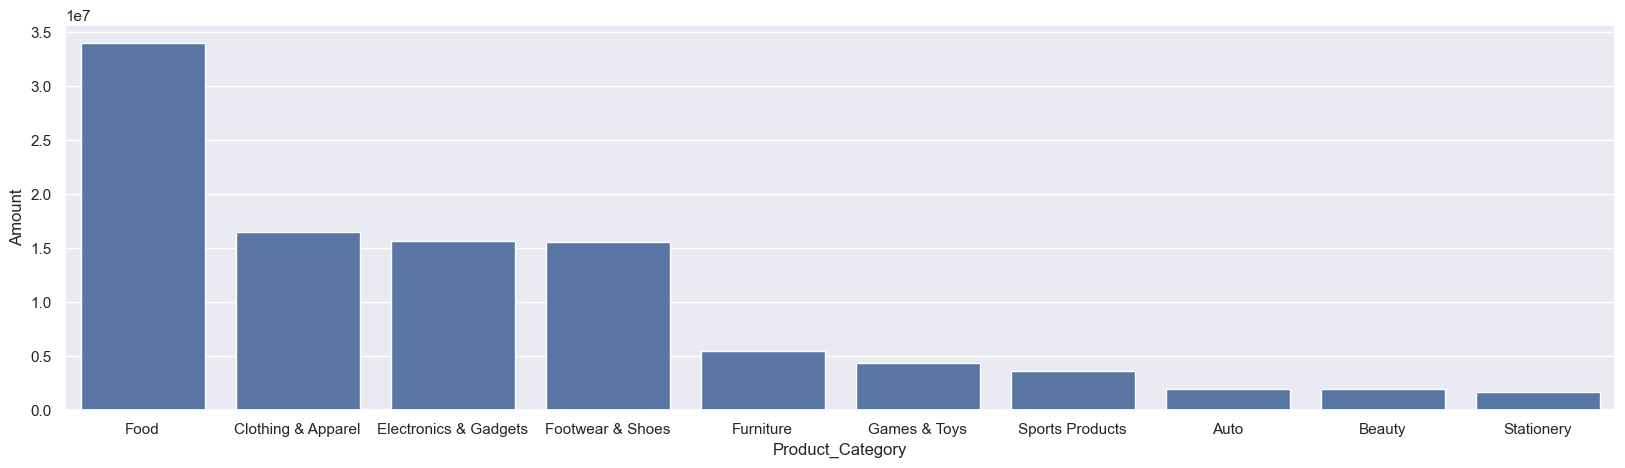

In [65]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

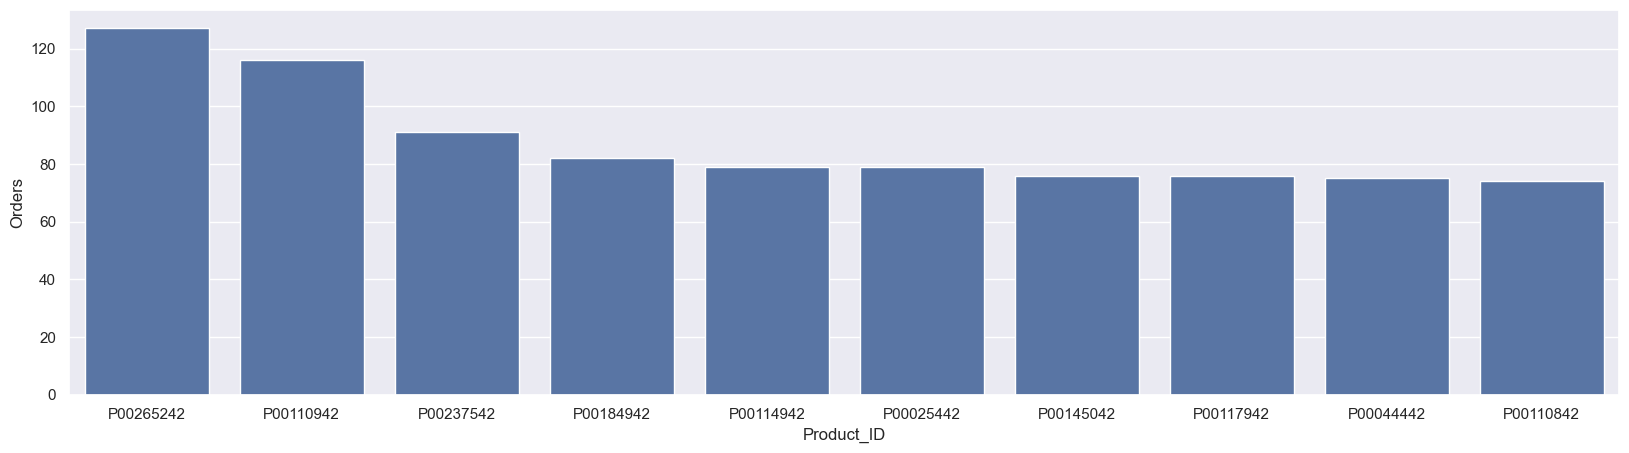

In [66]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

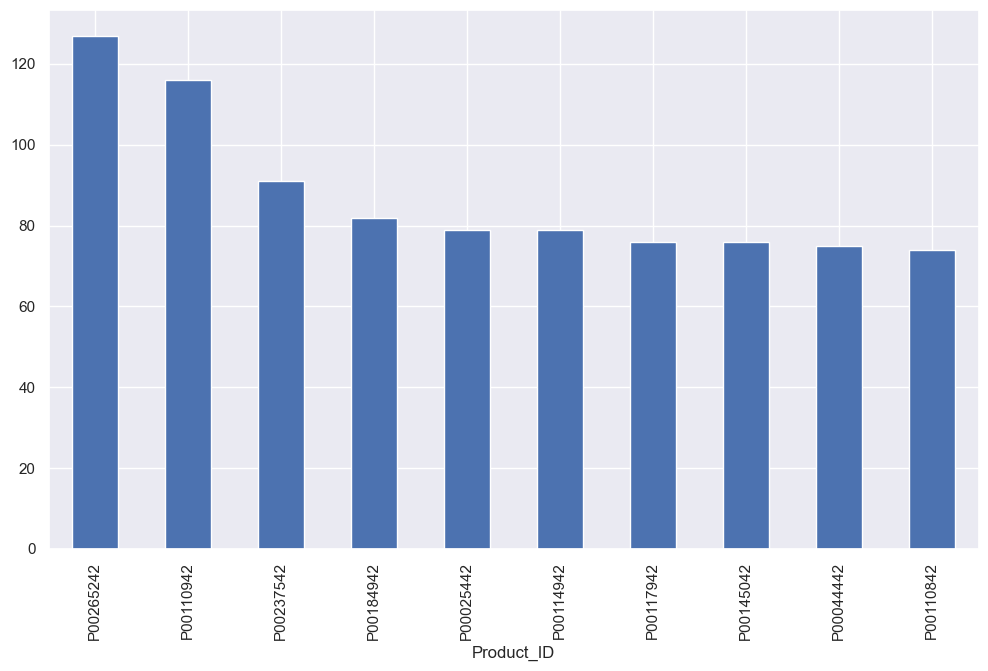

In [68]:

# top 10 most sold products (same thing as above)

fig1, ax1 = pl.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')